In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [4]:
from PIL import Image
img = Image.open('data/dart.png')

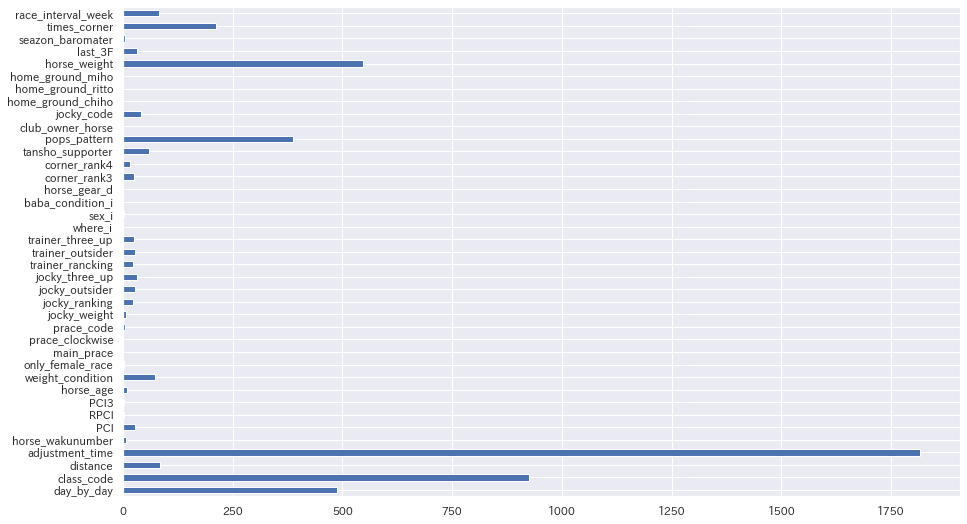

In [5]:
img

In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
wine = load_wine()

In [9]:
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
wine_data = wine.data[0:130]

In [12]:
train_X, val_X, train_t, val_t = train_test_split(wine.data, wine.target, test_size=0.25)

In [13]:
train_t

array([1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2,
       0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       1])

In [14]:
train_X = torch.from_numpy(train_X).float()
val_X =torch.from_numpy(val_X).float()
train_t = torch.from_numpy(train_t).long()
val_t = torch.from_numpy(val_t).long()

In [15]:
train = TensorDataset(train_X, train_t)

In [16]:
train[0]

(tensor([1.2990e+01, 1.6700e+00, 2.6000e+00, 3.0000e+01, 1.3900e+02, 3.3000e+00,
         2.8900e+00, 2.1000e-01, 1.9600e+00, 3.3500e+00, 1.3100e+00, 3.5000e+00,
         9.8500e+02]),
 tensor(1))

In [17]:
train_loader = DataLoader(train, batch_size=15, shuffle=True)

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.classifer = nn.Sequential(
            nn.Linear(13, 128),
            nn.BatchNorm1d(128),      # ノーマライズ
            nn.ReLU(inplace=True),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),      # ノーマライズ
            nn.ReLU(inplace=True),
            nn.Linear(128, 3) # 3クラス分類する
        )
        
    def forward(self, x):
        output = self.classifer(x)
        return output


In [19]:
model = Net()
model.to(device)

Net(
  (classifer): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [20]:
criterion = nn.CrossEntropyLoss()                   # 損失関数(分類問題なのでCrossEntropyLossを使う)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0) # 活性化関数 # weight_decay L2正則化（※不要な場合は0か省略）

In [21]:
epochs = 10

total_train_losses = []
total_train_accus = []
total_valid_losses = []
total_valid_accus = []

for epoch in range(epochs):
    total_loss = 0.0
    running_acc = 0.0
    valid_losses = []
    valid_accu = []
    
    model.train()
    for train_x, train_t in train_loader:
        #data, target = Variable(train_x), Variable(train_t)
        data, target = train_x.to(device), train_t.to(device)
        optimizer.zero_grad()
        output = model(data)
        #print(output)
        #print('y:', target)
        loss = criterion(output, target)
        
        total_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(target).float()).item()
        #print('p:', pred)
        
        loss.backward()
        optimizer.step()
        
    total_train_losse = np.mean(total_loss)
    total_train_accu = np.mean(running_acc)

    model.eval()
    with torch.no_grad(): # 勾配計算なし
        #val_x, val_y = Variable(val_X), Variable(val_t)
        val_x, val_t = val_X.to(device), val_t.to(device)
        val_y = model(val_x)
        loss_val = criterion(val_y, val_t)
        valid_losses.append(loss_val.item())
        #result = torch.max(val_y.data, 1)[1]
        #prediction = val_y.data.max(1)[1]
        #accuracy = sum(val_y.data.numpy() == prediction.numpy()) / len(val_y.data.numpy())
        prediction = val_y.data.max(1)[1] # テストデータ検証結果
        accuracy = prediction.eq(val_t.data).cpu().sum().numpy() / len(val_x.cpu()) # 正解率
        valid_accu.append(accuracy)
    
    total_valid_accu = np.mean(valid_accu)

    print('epoch: {}, train: [loss: {:.3f}, Accu: {:.3f}], test: [Accu: {:.3f}]'.format(epoch, total_train_losse, total_train_accu, total_valid_accu))


epoch: 0, train: [loss: 6.149, Accu: 5.892], test: [Accu: 0.489]
epoch: 1, train: [loss: 5.679, Accu: 6.492], test: [Accu: 0.578]
epoch: 2, train: [loss: 4.711, Accu: 6.856], test: [Accu: 0.689]
epoch: 3, train: [loss: 3.046, Accu: 7.790], test: [Accu: 0.533]
epoch: 4, train: [loss: 1.946, Accu: 8.267], test: [Accu: 0.400]
epoch: 5, train: [loss: 2.523, Accu: 7.923], test: [Accu: 0.400]
epoch: 6, train: [loss: 2.050, Accu: 8.056], test: [Accu: 0.422]
epoch: 7, train: [loss: 1.917, Accu: 8.236], test: [Accu: 0.467]
epoch: 8, train: [loss: 1.858, Accu: 8.267], test: [Accu: 0.600]
epoch: 9, train: [loss: 1.023, Accu: 8.579], test: [Accu: 0.644]


In [22]:
val_x, val_y = Variable(val_X), Variable(val_t)
result = torch.max(model(val_x.to(device)).data, 1)[1]
#accuracy = sum(val_y.data.numpy() == result.numpy()) / len(val_y.data.numpy())
accuracy = sum(val_y.to(device).data == result) / len(val_y.to(device).data)

In [23]:
accuracy

tensor(0.6444, device='cuda:0')